## Load Data (REPLACE THE DATA FROM THE PC)

In [2]:
# import modules and load data
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.utils import class_weight
from model import create_sequences

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

sequence_length = 30 * 3  # fps * seconds

# Load input and output data
X = np.load("../data/processed/input.npy")
Y = np.load("../data/processed/output.npy")

# TODO: Custom shuffle for RNN model
x_train_s, x_val_s, y_train_s, y_val_s = train_test_split(X, Y, test_size=0.15, shuffle=False)
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_train_s, y_train_s, test_size=0.18, shuffle=False)

# 15% test
# 15% validation
# 70% train

# Reshape the data from (n, 14) to (n, sequence_length, 14)
x_train, y_train = create_sequences(x_train_s, y_train_s, sequence_length)
x_val, y_val = create_sequences(x_val_s, y_val_s, sequence_length)
x_test, y_test = create_sequences(x_test_s, y_test_s, sequence_length)



## Simple RNN model benchmark

==== MODEL simple RNN ====
2377/2377 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step
Probability Plot:


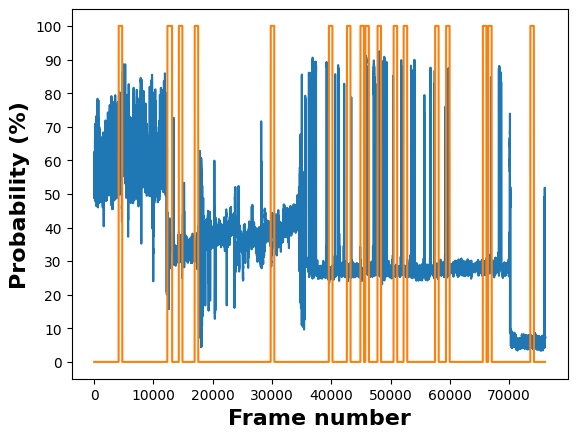

Predition/Test Plot:


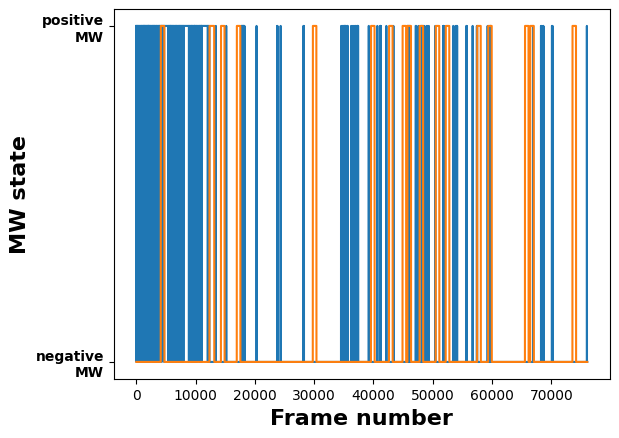

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.81      0.83     65629
         1.0       0.07      0.09      0.08     10435

    accuracy                           0.71     76064
   macro avg       0.46      0.45      0.45     76064
weighted avg       0.74      0.71      0.72     76064



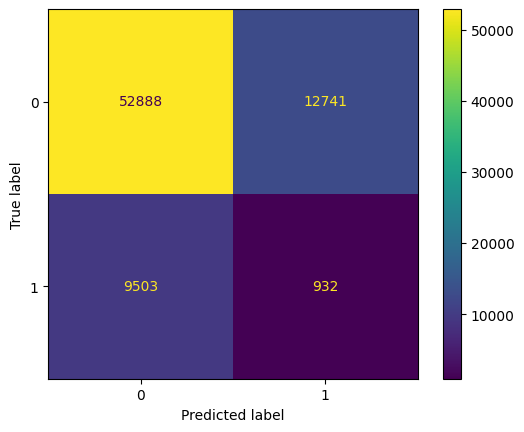

In [ ]:
# Import RNN model from the file
modelRNN = tf.keras.models.load_model('../NN/simpleRNN_model.keras')

print("==== MODEL simple RNN ====")

# Predict probabilities
y1_prob = modelRNN.predict(x_test)

# Convert probabilities to binary predictions (> 50% for positive prediction)
y1_pred = (y1_prob >= 0.5).astype(int).squeeze() 

# Confusion Matrix
cm1 = confusion_matrix(y_test, y1_pred)
disp1 = ConfusionMatrixDisplay(cm1)

print("Probability Plot:")
plt.plot(range(len(y1_prob)), y1_prob, y_test)
plt.xlabel('Frame number', fontsize=16, fontweight='bold')
plt.ylabel('Probability (%)', fontsize=16, fontweight='bold')
plt.yticks(np.arange(0.0, 1.1, 0.1), np.arange(0, 110, 10)) # Show ticks as percentage
plt.show()

print("Predition/Test Plot:")
plt.plot(range(len(y1_pred)), y1_pred, y_test)
plt.xlabel('Frame number', fontsize=16, fontweight='bold')
plt.ylabel('MW state', fontsize=16, fontweight='bold')
plt.yticks([0,1], ['negative\nMW', 'positive\nMW'], fontsize=10, fontweight='bold') # Show ticks as MW states
plt.show()

# Classification Report
report1 = classification_report(y_test, y1_pred)

disp1.plot()
print("Classification Report:\n", report1)

In [4]:
modelRNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 90, 14)         │            29 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 1024)           │     1,063,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,274,658 (20.12 MB)

 Trainable params: 1,756,929 (6.70 MB)

 Non-trainable params: 3,869 (15.12 KB)

 Optimizer params: 3,513,860 (13.40 MB)

## LSTM model benchmark

==== MODEL LSTM ====
2377/2377 ━━━━━━━━━━━━━━━━━━━━ 234s 98ms/step
Probability Plot:


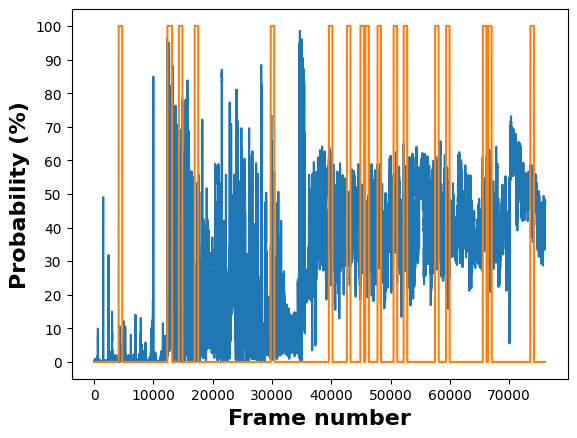

Predition/Test Plot:


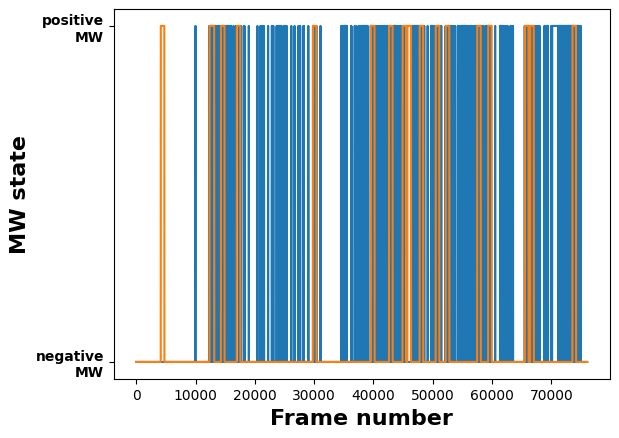

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.84      0.85     65629
         1.0       0.17      0.20      0.18     10435

    accuracy                           0.75     76064
   macro avg       0.52      0.52      0.52     76064
weighted avg       0.77      0.75      0.76     76064



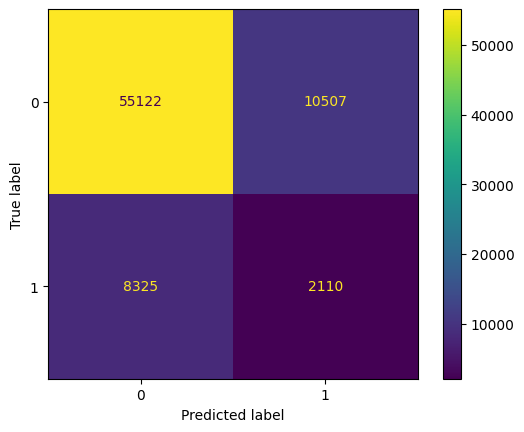

In [33]:
# Import the LSTM model
modelLSTM = tf.keras.models.load_model('../NN/LSTM_model.keras')

print("==== MODEL LSTM ====")

# Predict probabilities
y2_prob = modelLSTM.predict(x_test)

# Convert probabilities to binary predictions (> 50% for positive prediction)
y2_pred = (y2_prob >= 0.5).astype(int).squeeze() 

# Confusion Matrix
cm2 = confusion_matrix(y_test, y2_pred)
disp2 = ConfusionMatrixDisplay(cm2)

print("Probability Plot:")
plt.plot(range(len(y2_prob)), y2_prob, y_test)
plt.xlabel('Frame number', fontsize=16, fontweight='bold')
plt.ylabel('Probability (%)', fontsize=16, fontweight='bold')
plt.yticks(np.arange(0.0, 1.1, 0.1), np.arange(0, 110, 10)) # Show ticks as percentage
plt.show()

print("Predition/Test Plot:")
plt.plot(range(len(y2_pred)), y2_pred, y_test)
plt.xlabel('Frame number', fontsize=16, fontweight='bold')
plt.ylabel('MW state', fontsize=16, fontweight='bold')
plt.yticks([0,1], ['negative\nMW', 'positive\nMW'], fontsize=10, fontweight='bold') # Show ticks as MW states
plt.show()

# Classification Report
report2 = classification_report(y_test, y2_pred)

disp2.plot()
print("Classification Report:\n", report2)


In [5]:
modelLSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 90, 14)         │            29 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 1024)           │     4,255,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,850,082 (56.65 MB)

 Trainable params: 4,948,737 (18.88 MB)

 Non-trainable params: 3,869 (15.12 KB)

 Optimizer params: 9,897,476 (37.76 MB)

## Compare models

PR Curve Plot


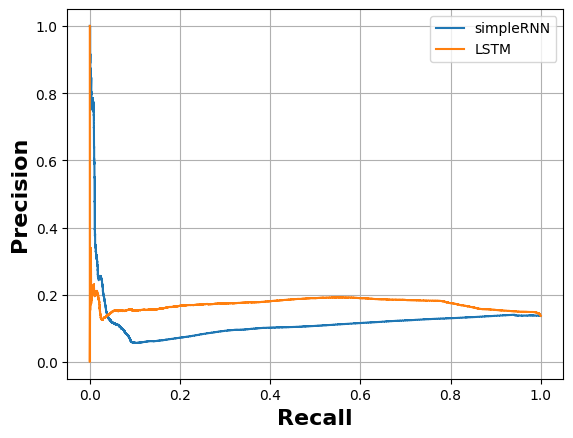

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision, recall, and thresholds for the LSTM model
precision1, recall1, thresholds1 = precision_recall_curve(y_test, y1_prob)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y2_prob)

print("PR Curve Plot")

# Plot the Precision-Recall curve
plt.plot(recall1, precision1, marker=',', label='simpleRNN')
plt.plot(recall2, precision2, marker=',', label='LSTM')
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

Looks like the LSTM model is better predictor for our cause, LSTM model is the chosen model for this research.
To find the optimal threshold, the available options:
1. F1 score based on precision and recall (f1 = [2 * precision * recall] / [precision + recall]) threshold tuning.
2. Moving averaged threshold.

Optimal Threshold for Macro Avg F1-Score: 0.4625
  - Best Macro F1-Score: 0.5216
  - Positive Class F1-Score at this threshold: 0.2162

Classification Report (Optimized for Macro Avg F1-Score):
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83     65629
         1.0       0.17      0.28      0.22     10435

    accuracy                           0.72     76064
   macro avg       0.52      0.54      0.52     76064
weighted avg       0.78      0.72      0.74     76064

Confusion Matrix (Optimized for Macro Avg F1-Score):


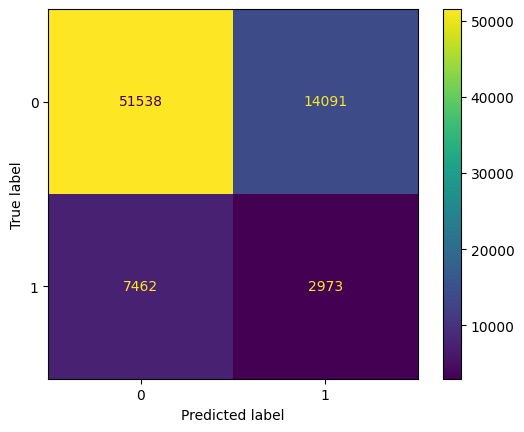


Normalized Cross-Correlation Plot:


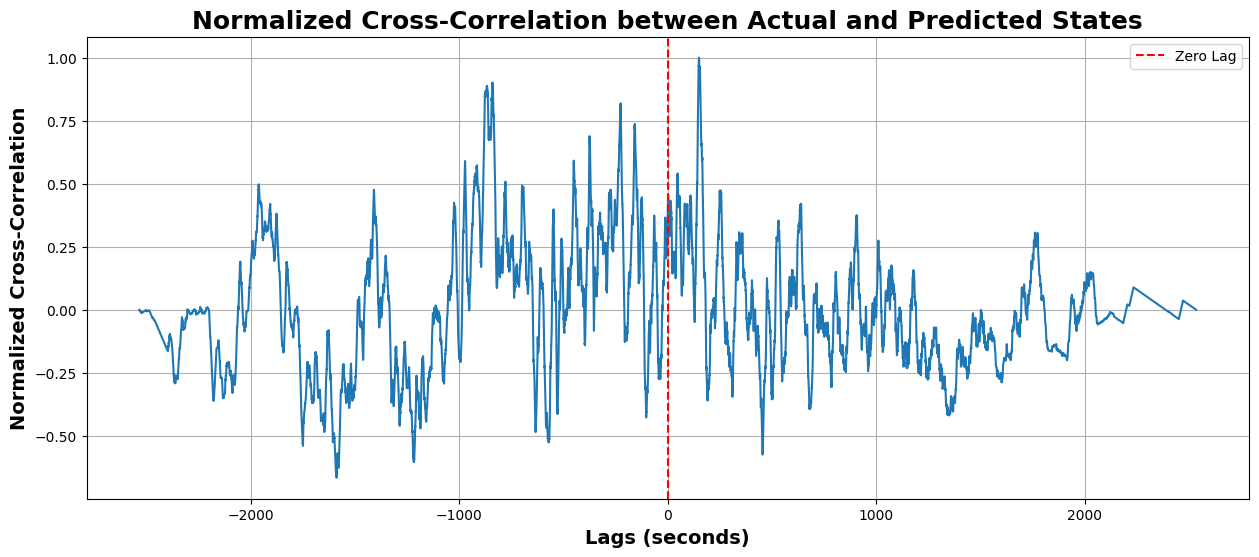

In [61]:
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# --- Find Optimal Threshold by Maximizing Macro Average F1-Score ---

thresholds_to_test = np.linspace(0, 1, 1000)  # Test 1000 different thresholds

best_threshold = 0
best_f1_macro = 0
f1_positive_at_best_macro = 0

for threshold in thresholds_to_test:
    # Get predictions for the current threshold
    y2_pred_test = (y2_prob >= threshold).astype(int)
    
    # Calculate the macro average F1-score
    f1_macro = f1_score(y_test, y2_pred_test, average='macro', zero_division=0)
    
    # Check if this threshold gives a better macro average F1-score
    if f1_macro > best_f1_macro:
        best_f1_macro = f1_macro
        best_threshold = threshold
        # Also store the positive class F1-score at this best threshold
        f1_positive_at_best_macro = f1_score(y_test, y2_pred_test, pos_label=1, zero_division=0)

print(f"Optimal Threshold for Macro Avg F1-Score: {best_threshold:.4f}")
print(f"  - Best Macro F1-Score: {best_f1_macro:.4f}")
print(f"  - Positive Class F1-Score at this threshold: {f1_positive_at_best_macro:.4f}")

# --- Re-evaluate with the new optimal threshold ---
y2_pred_optimal = (y2_prob >= best_threshold).astype(int)

print("\nClassification Report (Optimized for Macro Avg F1-Score):")
print(classification_report(y_test, y2_pred_optimal))

print("Confusion Matrix (Optimized for Macro Avg F1-Score):")
cm_optimal = confusion_matrix(y_test, y2_pred_optimal)
disp_optimal = ConfusionMatrixDisplay(cm_optimal)
disp_optimal.plot()
plt.show()

# --- Plot Normalized Cross-Correlation with Lags in Seconds ---
print("\nNormalized Cross-Correlation Plot:")

# Normalize the input signals
y_test_norm = (y_test - np.mean(y_test)) / np.std(y_test)
y_pred_norm = (y2_pred_optimal - np.mean(y2_pred_optimal)) / np.std(y2_pred_optimal)

# Calculate the cross-correlation
correlation = np.correlate(y_test_norm.squeeze(), y_pred_norm.squeeze(), mode='full')

# Normalize the correlation values to be between -1 and 1 
correlation_normalized = correlation / np.max(np.abs(correlation))

# Create the lags in frames and convert to seconds
fps = 30
lags_in_frames = np.arange(-len(y_test) + 1, len(y_test))
lags_in_seconds = lags_in_frames / fps

plt.figure(figsize=(15, 6))
plt.plot(lags_in_seconds, correlation_normalized)
plt.title('Normalized Cross-Correlation between Actual and Predicted States', fontsize=18, fontweight='bold')
plt.xlabel('Lags (seconds)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Cross-Correlation', fontsize=14, fontweight='bold')
plt.axvline(0, color='red', linestyle='--', label='Zero Lag')
plt.grid(True)
plt.legend()
plt.show()

Starting grid search for optimal parameters...

--- Grid Search Complete ---
Best Window Size: 120 frames (4.0 seconds)
Best K Value: 1.00
Best Balanced F1-Score: 0.2738

Classification Report with Optimal Dynamic Threshold:
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82     65629
         1.0       0.15      0.25      0.19     10435

    accuracy                           0.71     76064
   macro avg       0.51      0.51      0.51     76064
weighted avg       0.77      0.71      0.74     76064

Confusion Matrix with Optimal Dynamic Threshold:


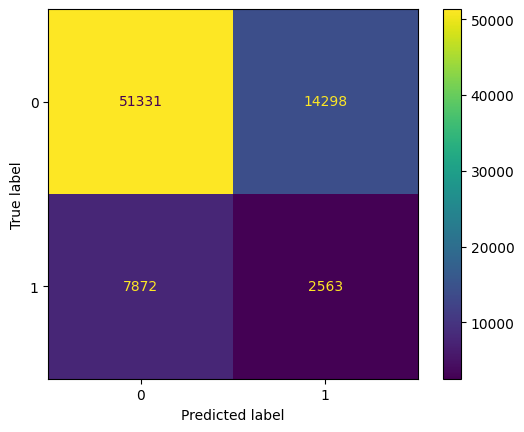


Plot of Actual vs. Predicted State with Optimal Dynamic Threshold:


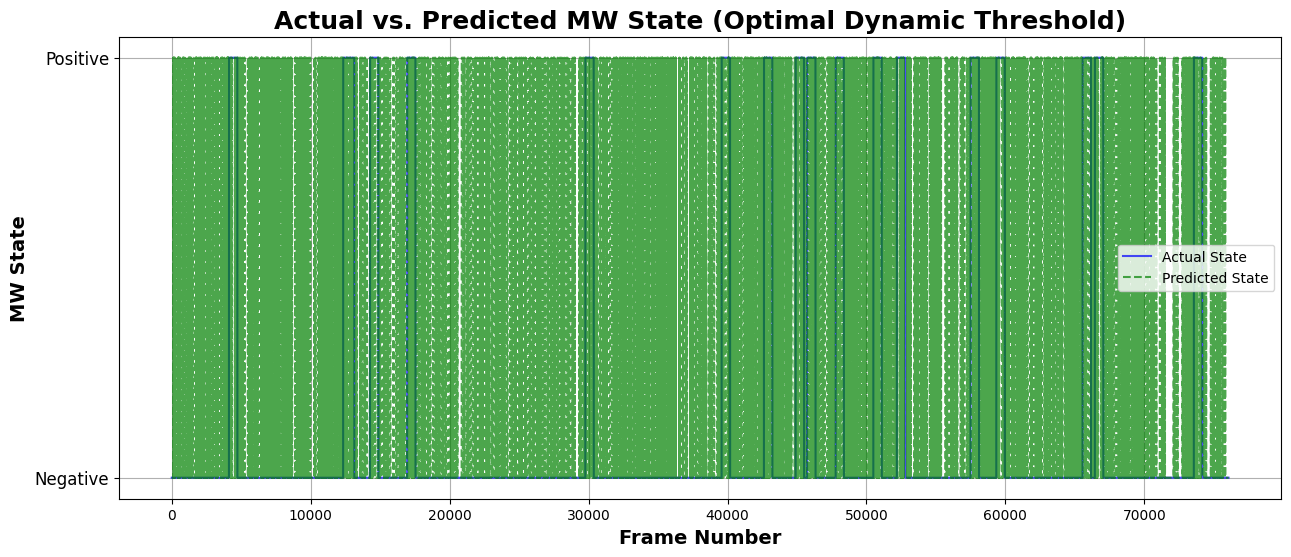

In [57]:
import pandas as pd
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# --- Grid Search for Optimal Moving Average Parameters ---

# Define the parameter grid to search
window_sizes = [30, 60, 90, 120, 180]  # Corresponds to 1, 2, 3, 4, 6 seconds
k_values = np.arange(1.0, 3.5, 0.25)     # Test a range of standard deviation multipliers

# Variables to store the best results from the search
best_params = {'window': 0, 'k': 0}
best_overall_balanced_f1 = 0
y2_pred_optimal_dynamic = None

print("Starting grid search for optimal parameters...")

# --- Loop through all parameter combinations ---
for window_size in window_sizes:
    for k in k_values:
        # Calculate rolling mean and std
        y2_prob_series = pd.Series(y2_prob.squeeze())
        moving_avg = y2_prob_series.rolling(window=window_size).mean()
        moving_std = y2_prob_series.rolling(window=window_size).std()

        # Calculate the dynamic threshold
        dynamic_threshold = moving_avg + k * moving_std
        dynamic_threshold.fillna(best_threshold, inplace=True) # Use previous best constant threshold for initial NaN values

        # Get predictions
        y2_pred_test = (y2_prob.squeeze() > dynamic_threshold).astype(int)
        
        # Calculate F1-scores
        f1_positive = f1_score(y_test, y2_pred_test, pos_label=1, zero_division=0)
        f1_macro = f1_score(y_test, y2_pred_test, average='macro', zero_division=0)
        
        # Calculate the balanced (harmonic mean) score
        balanced_f1 = 2 * (f1_positive * f1_macro) / (f1_positive + f1_macro + 1e-6)
        
        # Check if this combination is the best so far
        if balanced_f1 > best_overall_balanced_f1:
            best_overall_balanced_f1 = balanced_f1
            best_params['window'] = window_size
            best_params['k'] = k
            y2_pred_optimal_dynamic = y2_pred_test # Save the best predictions

print("\n--- Grid Search Complete ---")
print(f"Best Window Size: {best_params['window']} frames ({best_params['window']/30.0:.1f} seconds)")
print(f"Best K Value: {best_params['k']:.2f}")
print(f"Best Balanced F1-Score: {best_overall_balanced_f1:.4f}")


# --- Evaluate and Plot using the Optimal Dynamic Threshold ---
print("\nClassification Report with Optimal Dynamic Threshold:")
print(classification_report(y_test, y2_pred_optimal_dynamic))

print("Confusion Matrix with Optimal Dynamic Threshold:")
cm_dynamic_optimal = confusion_matrix(y_test, y2_pred_optimal_dynamic)
disp_dynamic_optimal = ConfusionMatrixDisplay(cm_dynamic_optimal)
disp_dynamic_optimal.plot()
plt.show()


# --- Plot Actual vs. Predicted State ---
print("\nPlot of Actual vs. Predicted State with Optimal Dynamic Threshold:")
plt.figure(figsize=(15, 6))
plt.plot(range(len(y_test)), y_test, label='Actual State', color='blue', alpha=0.7)
plt.plot(range(len(y2_pred_optimal_dynamic)), y2_pred_optimal_dynamic, label='Predicted State', color='green', linestyle='--', alpha=0.7)
plt.title('Actual vs. Predicted MW State (Optimal Dynamic Threshold)', fontsize=18, fontweight='bold')
plt.xlabel('Frame Number', fontsize=14, fontweight='bold')
plt.ylabel('MW State', fontsize=14, fontweight='bold')
plt.yticks([0, 1], ['Negative', 'Positive'], fontsize=12)
plt.legend()
plt.grid(True)
plt.show()